In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Large Random Samples

In [2]:
united = Table.read_table('data/united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united_bins = np.arange(-20, 201, 5)
united # united airlines flights in summer of 2015

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


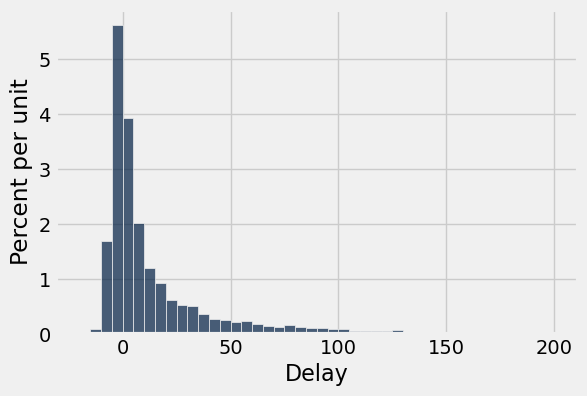

In [3]:
# (Population) Probability Distribution
united.hist('Delay', bins = united_bins)

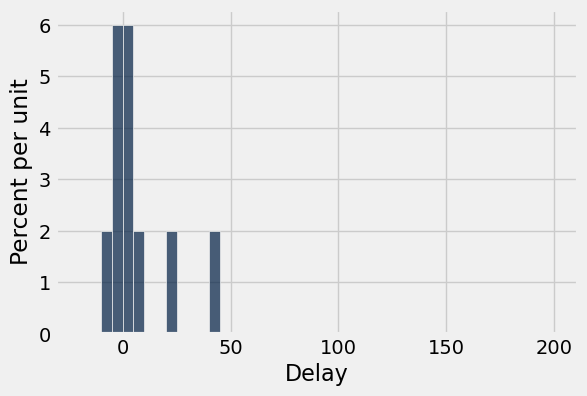

In [4]:
# (Sample) Empirical Distribution
united.sample(10).hist('Delay', bins = united_bins)

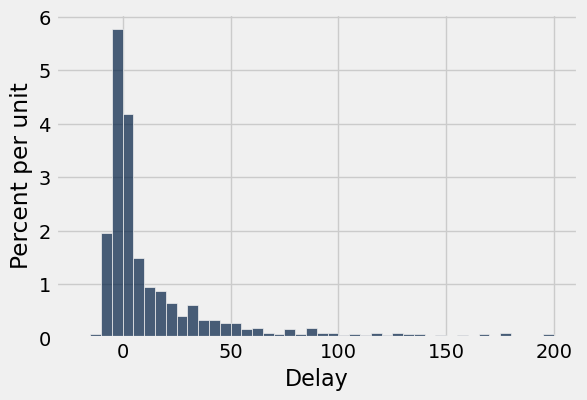

In [5]:
# (Sample) Empirical Distribution
united.sample(1000).hist('Delay', bins = united_bins)

## Statistics

In [6]:
# (Population) Parameter - median flight delay for united flights in summer 2015
# 2 minutes late
np.median(united.column('Delay'))

2.0

In [7]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

0.5

In [8]:
# (Sample) Statistic
np.median(united.sample(100).column('Delay'))

1.0

In [9]:
# sample statistic is trying to estimate the TRUE population parameter
# in this case, we have access to the population data (all summer 2015 united flights)
# most cases, we will not have access to population data, and therefore
# not know the TRUE population parameter that we are estimating

# think fixed unknown value of how much UG student spend on takeout in a given week
# think fixed unknown value of average age of all humans living on this planet now


### Probability & Empirical Distributions of a Statistic

In [10]:
# now that we've sampled our united table above
# and take a sample statistic: median of the sample

# let's now define a function, called sample_median
# which takes in one argument, size
# that allows you to take a sample of the united table
# and find a sample statistic: median of the sample

def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [11]:
sample_median(10)

1.5

In [12]:
num_simulations = 2000

In [13]:
sample_medians = make_array() # initialize an empty array
# to capture stuff later on

for i in np.arange(num_simulations): # for loop will run 2000
    new_median = sample_median(10) # generate a new sample of size 10, from united table
    # store median flight delay in new_median
    sample_medians = np.append(sample_medians, new_median) # store new_median in sample_medians array
    # first time we run through our for loop, sample_medians will be empty

In [14]:
len(sample_medians)

2000

In [15]:
sample_medians.hist()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

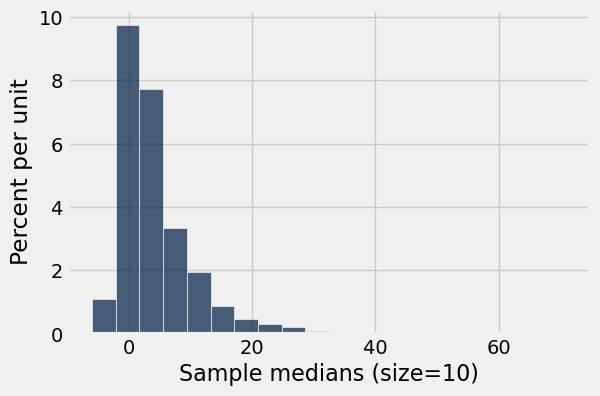

In [17]:
Table().with_column('Sample medians (size=10)', sample_medians).hist(bins=20)

In [18]:
sample_medians = make_array()

for i in np.arange(num_simulations): # generate 2000 samples, each sample has a size of 1,000 flights from united
    new_median = sample_median(5000)
    sample_medians = np.append(sample_medians, new_median)

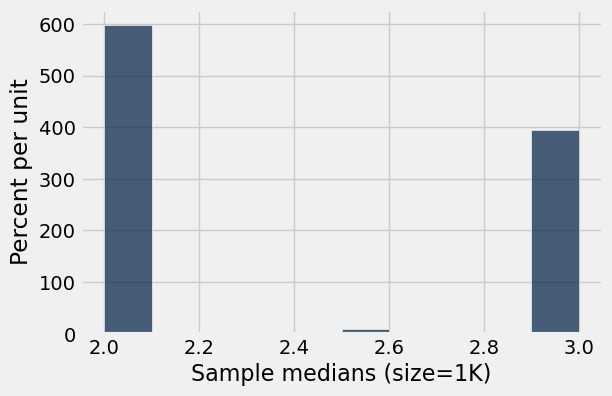

In [19]:
Table().with_column('Sample medians (size=1K)', sample_medians).hist()

In [20]:
# why do our previous two graphs look so different?
# sample size went from 10 to 1000

# what effect does sample size have on our estimations of the population parameter?
# increased sample size improves our estimations!

# 




#### Empirical Distributions Overlayed

In [21]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [22]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

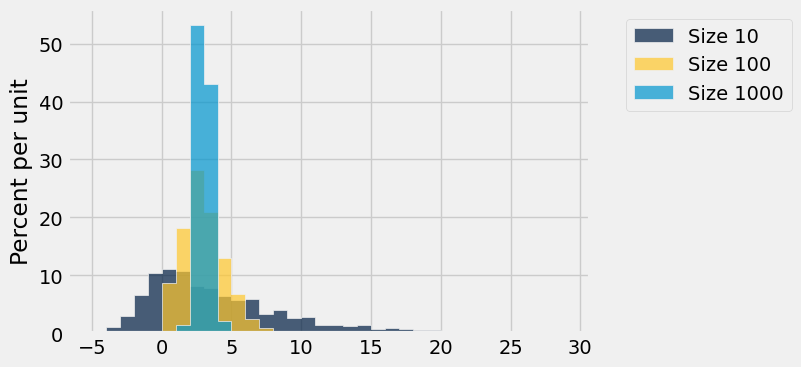

In [23]:
sample_medians.hist(bins = np.arange(-5, 30))

## Swain vs. Alabama ##

In [24]:
population_proportions = make_array(.26, .74)
population_proportions # talladega county, alabama in 1965
# 26% were black in talladega county - .26 representing proportion of black men in county
# 74% were not black in talladega county - .74 representing proportion of non-black men in county

array([ 0.26,  0.74])

In [25]:
sample_proportions(100, population_proportions)
#simulating a jury panel of 100
# sampling from population_proportions, talladega county population
# first element in my array represents proportion of black men in my jury panel of 100
# second element in my array represents proportion of non-black men in my jury panel of 100

array([ 0.27,  0.73])

In [26]:
help(sample_proportions)

Help on function sample_proportions in module datascience.util:

sample_proportions(sample_size, probabilities)
    Return the proportion of random draws for each outcome in a distribution.
    
    This function is similar to np.random.multinomial, but returns proportions
    instead of counts.
    
    Args:
        ``sample_size``: The size of the sample to draw from the distribution.
    
        ``probabilities``: An array of probabilities that forms a distribution.
    
    Returns:
        An array with the same length as ``probability`` that sums to 1.



In [27]:
def panel_proportion():
    # proportion of black men in my jury panel of 100
    return sample_proportions(100, population_proportions).item(0)

In [51]:
panel_proportion() 
# one simulation of a jury panel selection from talladega county
# done without bias, randomly
# value below is the proportion of black men on my jury panel of 100
#.34 = 34 black men in a jury panel of 100

0.19

In [29]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100 # convert proportion to percentage, or # of black men on jury panel of 100
    panels = np.append(panels, new_panel)

In [30]:
len(panels)
# 10,000 jury panels simulated
# each element in panels represents a percentage of black men in a simulated jury panel

10000

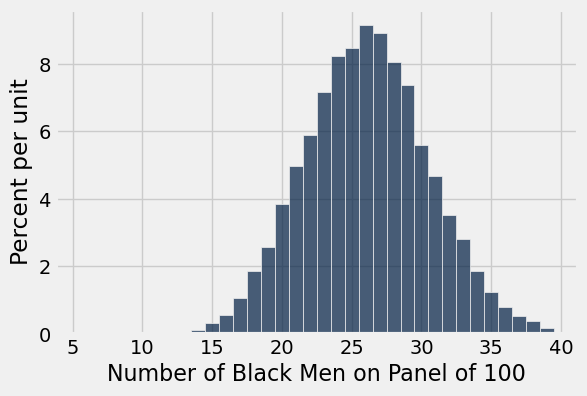

In [31]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))

# based on the histogram generated below....
# how would you answer the supreme court in its ruling of swain's appeal?

# were we ever able to simulate what actually happened in swain's jury panel?


## Mendel and Pea Flowers ##

In [32]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [56]:
predicted_proportions = make_array(.75, .25) 
# 75% probability of pea plants have purple flowers
# 25% having non-purple flowers
sample_proportions(929, predicted_proportions)

array([ 0.75026911,  0.24973089])

In [34]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [64]:
purple_flowers()
# below is the percentage of purple flowers in simulated garden of 929 pea plants



75.67276641550053

In [36]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

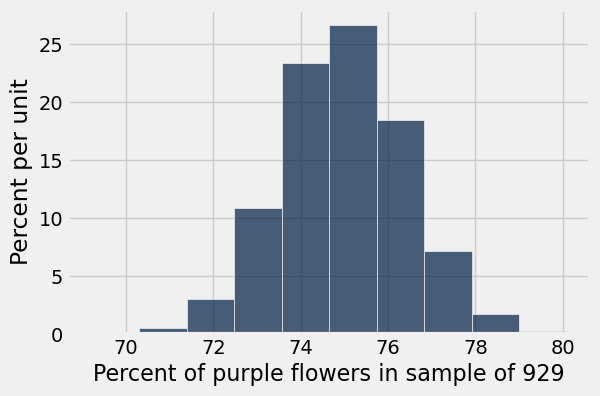

In [37]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

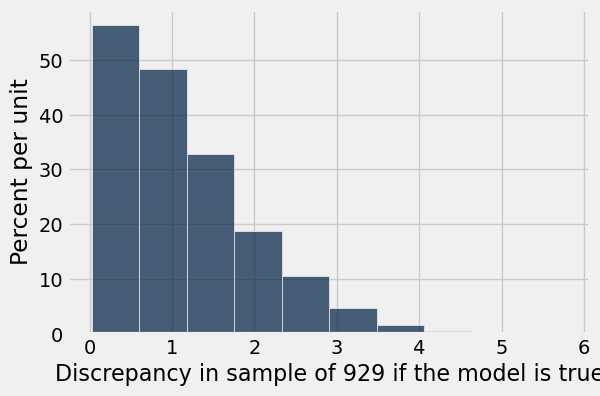

In [38]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [39]:
abs(observed_purples * 100 - 75)

1.318622174381062